In [22]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/parkinsons data.csv')
print(myData.shape)

(195, 24)


In [23]:
peek = myData.head(10)
print(peek)

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0  phon_R01_S01_1      119.992       157.302        74.997           0.008         7.000e-05   
1  phon_R01_S01_2      122.400       148.650       113.819           0.010         8.000e-05   
2  phon_R01_S01_3      116.682       131.111       111.555           0.011         9.000e-05   
3  phon_R01_S01_4      116.676       137.871       111.366           0.010         9.000e-05   
4  phon_R01_S01_5      116.014       141.781       110.655           0.013         1.100e-04   
5  phon_R01_S01_6      120.552       131.162       113.787           0.010         8.000e-05   
6  phon_R01_S02_1      120.267       137.244       114.820           0.003         3.000e-05   
7  phon_R01_S02_2      107.332       113.840       104.315           0.003         3.000e-05   
8  phon_R01_S02_3       95.730       132.068        91.754           0.006         6.000e-05   
9  phon_R01_S02_4       95.056       120

In [24]:
shape = myData.shape
print(shape)

(195, 24)


In [25]:
types = myData.dtypes
print(types)

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [26]:
outcome_counts = myData.groupby('status').size()
print(outcome_counts)

status
0     48
1    147
dtype: int64


In [27]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
MDVP:Fo(Hz)             1.000         0.401         0.597          -0.118            -0.382   
MDVP:Fhi(Hz)            0.401         1.000         0.085           0.102            -0.029   
MDVP:Flo(Hz)            0.597         0.085         1.000          -0.140            -0.278   
MDVP:Jitter(%)         -0.118         0.102        -0.140           1.000             0.936   
MDVP:Jitter(Abs)       -0.382        -0.029        -0.278           0.936             1.000   
MDVP:RAP               -0.076         0.097        -0.101           0.990             0.923   
MDVP:PPQ               -0.112         0.091        -0.096           0.974             0.898   
Jitter:DDP             -0.076         0.097        -0.100           0.990             0.923   
MDVP:Shimmer           -0.098         0.002        -0.145           0.769             0.703   
MDVP:Shimmer(dB)       -0.074         0.043       

<AxesSubplot:ylabel='Frequency'>

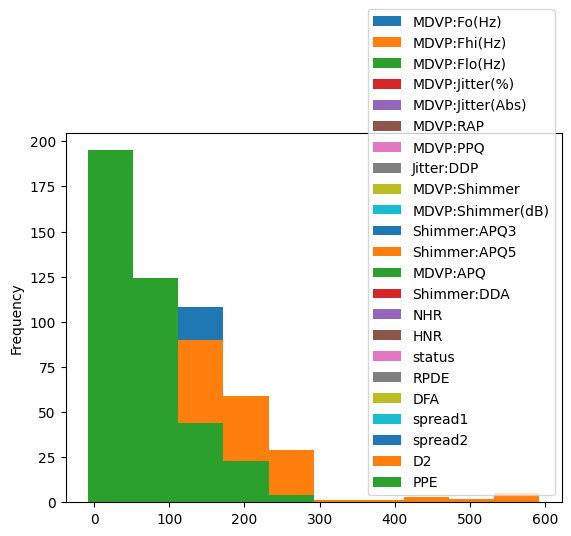

In [28]:
import matplotlib.pyplot as plt
myData.plot.hist()

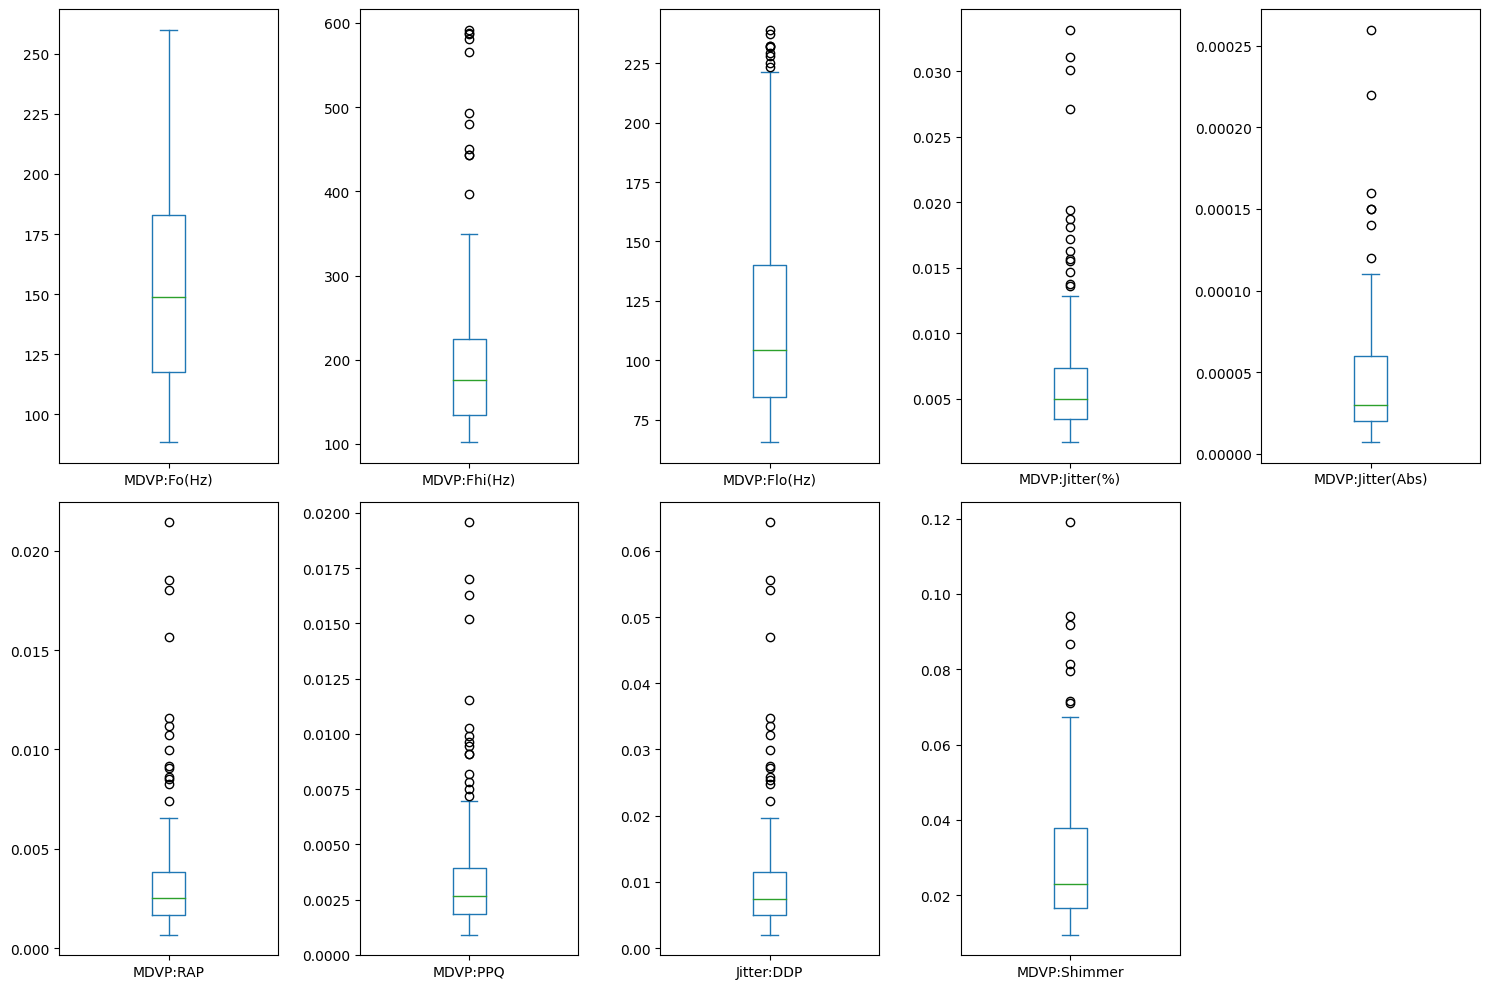

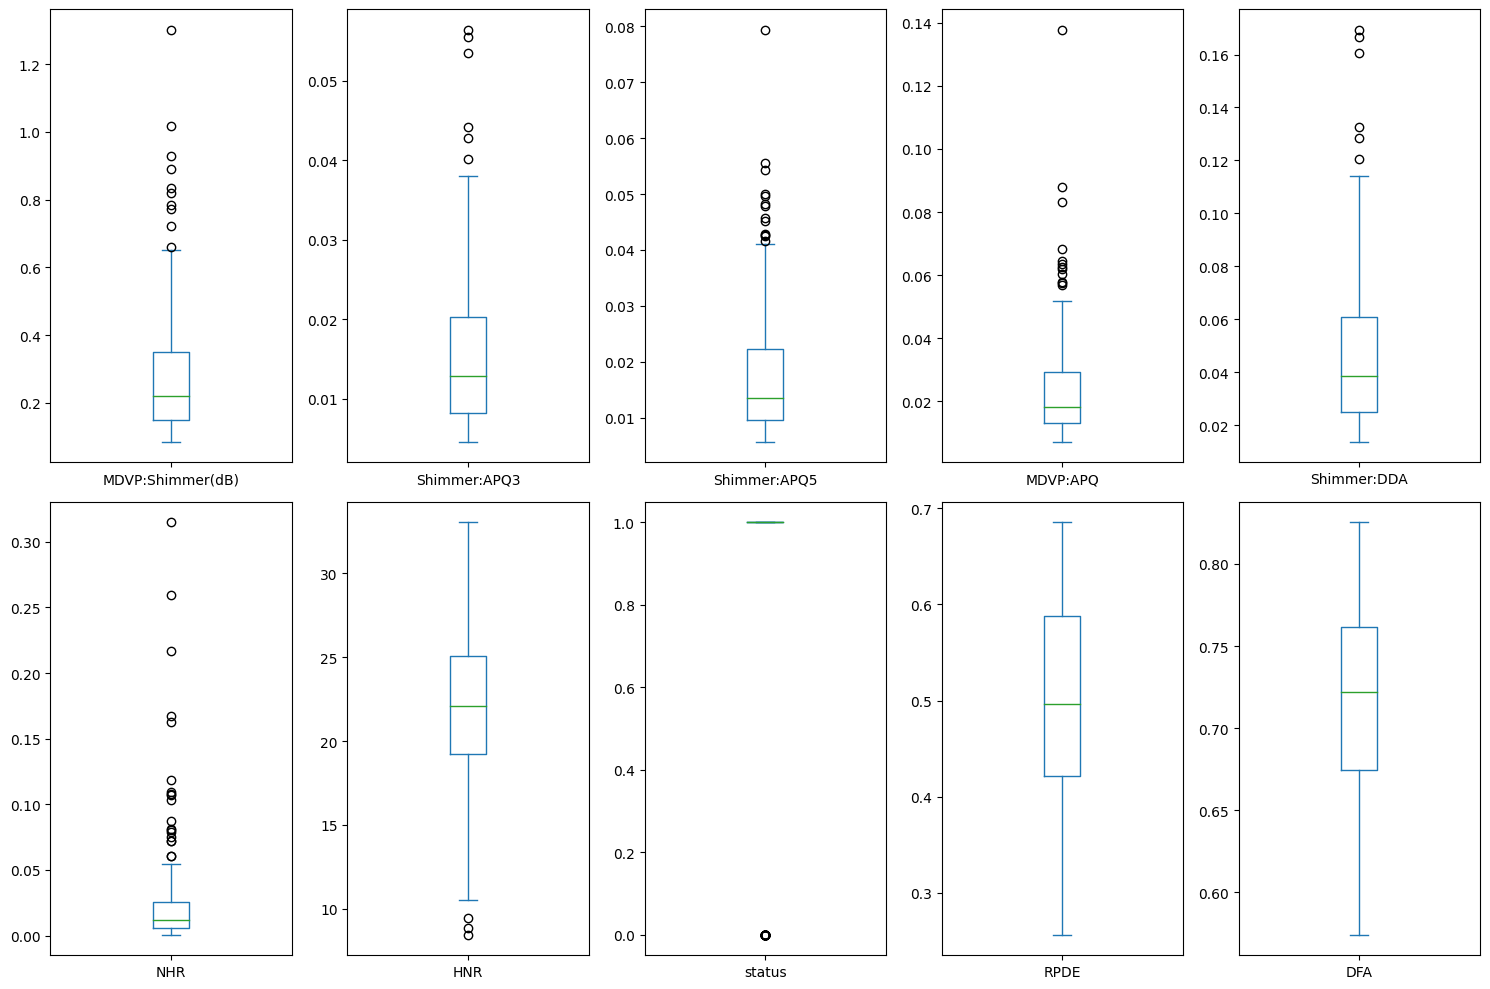

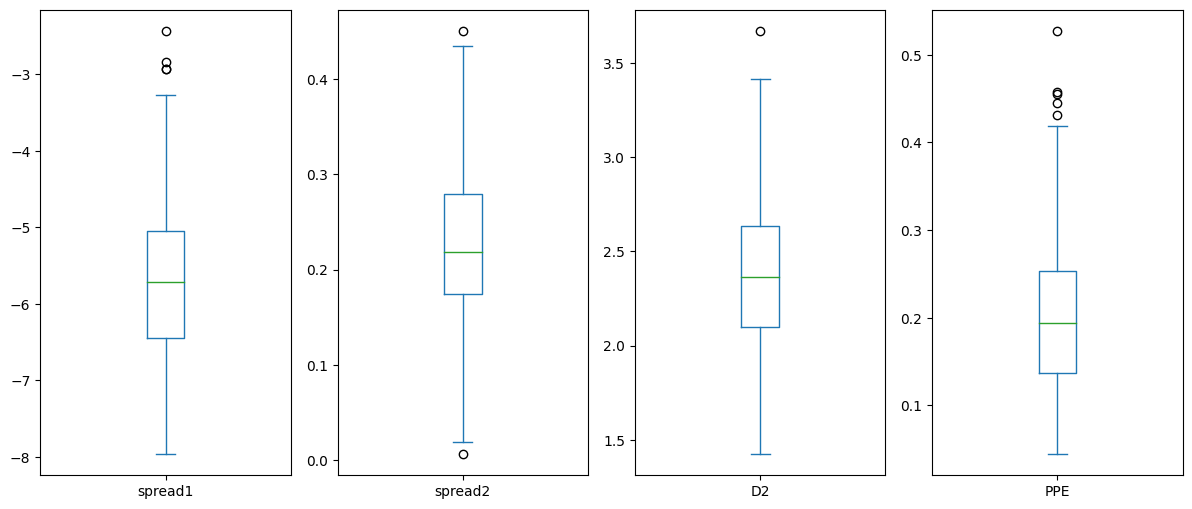

In [29]:
import matplotlib.pyplot as plt
num_columns = len(myData.columns)
cols_per_fig = 10

for i in range(0, num_columns, cols_per_fig):
    myData.iloc[:, i:i+cols_per_fig].plot(
        kind='box', 
        subplots=True, 
        layout=(2, 5),
        figsize=(15, 10),
        sharex=False,
        sharey=False
    )
    plt.tight_layout()
    plt.show()

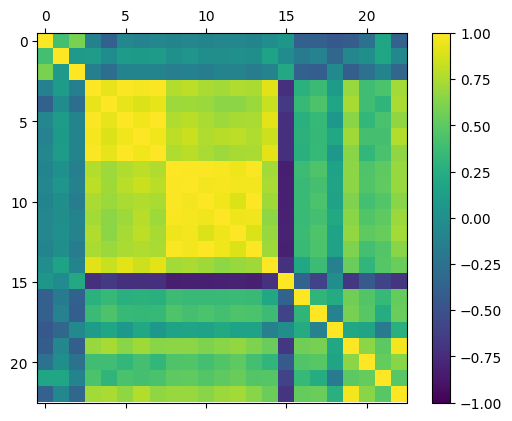

In [30]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [31]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['name']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [32]:
X = myData.drop('status', axis=1).values
Y = myData['status'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.103 0.381 0.13  0.002 0.213 0.17  0.173 0.192 0.174 0.261 0.2   0.233
  0.246 0.255 0.233 0.121 0.37  0.942 0.517 0.7   0.577 0.586 0.665]
 [0.108 0.382 0.144 0.073 0.099 0.091 0.079 0.094 0.079 0.291 0.234 0.302
  0.274 0.291 0.302 0.057 0.449 0.869 0.497 0.502 0.521 0.505 0.446]
 [0.113 0.463 0.186 0.078 0.087 0.091 0.073 0.083 0.073 0.31  0.24  0.341
  0.267 0.27  0.342 0.039 0.57  0.846 0.421 0.657 0.577 0.664 0.499]
 [0.119 0.498 0.185 0.119 0.098 0.091 0.074 0.089 0.074 0.296 0.229 0.334
  0.258 0.234 0.334 0.056 0.487 0.655 0.449 0.491 0.459 0.5   0.433]
 [0.124 0.439 0.201 0.065 0.182 0.17  0.15  0.16  0.15  0.064 0.065 0.055
  0.051 0.06  0.055 0.055 0.625 0.33  0.63  0.435 0.483 0.564 0.355]]


In [33]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('status', axis=1).values
mydata_label = myData['status'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[ 8.437e-02  6.490e-01  6.991e-01  2.775e-01  3.543e-05  2.109e-07
   1.805e-05  1.898e-05  5.421e-05  1.607e-04  1.384e-03  7.032e-05
   1.005e-04  1.711e-04  2.109e-04  1.633e-04  7.397e-02  2.785e-03
   2.970e-03 -1.728e-02  1.108e-03  1.156e-02  1.541e-03]
 [ 8.536e-02  6.255e-01  7.027e-01  3.176e-01  1.951e-05  1.219e-07
   9.431e-06  1.085e-05  2.829e-05  1.682e-04  1.504e-03  8.215e-05
   1.053e-04  1.839e-04  2.464e-04  7.516e-05  7.924e-02  2.557e-03
   2.841e-03 -2.108e-02  9.659e-04  1.040e-02  1.056e-03]
 [ 8.154e-02  6.224e-01  7.161e-01  2.930e-01  1.638e-05  1.112e-07
   8.154e-06  9.154e-06  2.450e-05  1.613e-04  1.397e-03  8.257e-05
   9.414e-05  1.574e-04  2.478e-04  4.744e-05  8.327e-02  2.294e-03
   2.520e-03 -1.605e-02  9.724e-04  1.081e-02  1.059e-03]
 [ 8.354e-02  6.317e-01  7.000e-01  3.130e-01  1.729e-05  1.090e-07
   8.027e-06  9.371e-06  2.408e-05  1.523e-04  1.322e-03  7.943e-05
   8.971e-05  1.370e-04  2.383e-04  6.683e-05  7.418e-02  1.951e-03
   2.495e-

In [34]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]]


In [35]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('status', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('status', axis=1).values
mydata_label = myData['status'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[ 5.571 33.287  5.478 32.613 16.193 25.003 14.775 17.549 14.773 30.123
 27.065 26.527 27.145 29.536 26.526  7.183 29.016 20.31  10.953 90.424
 50.343 25.266 75.803]


In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False False False False False  True  True False False False False  True
 False False  True False False False False False False False False]
Feature Ranking: [18 17 20 19  3  1  1  5  2  4  9  1  6 14  1  8 16 12 10 13 11 15  7]


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.582 0.209 0.168]
[[ 1.238e-01  2.190e-01  9.647e-01  7.852e-02  4.493e-06 -2.665e-08
   2.839e-06  2.227e-06  8.513e-06 -2.342e-06  6.700e-05 -1.846e-06
  -2.672e-06 -8.444e-07 -5.535e-06  6.920e-05 -1.223e-03 -1.670e-04
  -2.299e-04 -1.447e-03 -3.784e-05  7.600e-04 -1.132e-04]
 [ 9.330e-01 -2.094e-01 -4.878e-02 -2.880e-01  1.197e-05  9.525e-08
   7.834e-06  4.415e-06  2.351e-05  1.997e-05  2.502e-04  1.125e-05
   4.774e-06  1.881e-05  3.374e-05  1.305e-04 -2.012e-02  4.322e-04
  -1.848e-04  3.416e-03  8.939e-06  5.205e-04  1.331e-04]
 [ 3.368e-01  5.544e-01 -2.282e-01  7.260e-01 -1.395e-05 -2.236e-07
  -5.271e-06 -6.897e-06 -1.581e-05 -4.947e-05 -4.326e-04 -2.646e-05
  -2.318e-05 -3.187e-05 -7.938e-05 -6.366e-05  7.831e-03 -7.176e-04
  -2.318e-04 -8.579e-03 -4.967e-04 -1.322e-04 -6.730e-04]]


In [38]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(195, 3)


In [39]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(195, 4)


In [40]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

myData['status'] = pd.cut(myData['status'], bins=3, labels=[0, 1, 2])
mydata_label = myData['status'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.096 0.089 0.033 0.062 0.033 0.047 0.031 0.026 0.032 0.028 0.028 0.029
 0.036 0.029 0.029 0.023 0.028 0.029 0.036 0.091 0.039 0.041 0.087]
